In [1]:
from google.colab import files
files.upload()  # Upload kaggle.json


Saving FM.zip to FM.zip


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d zalando-research/fashionmnist
!unzip fashionmnist.zip -d fashion_mnist


In [5]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize and reshape
X_train = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test = X_test.reshape(-1, 28, 28, 1) / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=64)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 46s 58ms/step - accuracy: 0.6874 - loss: 0.8566 - val_accuracy: 0.8556 - val_loss: 0.3948
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 44s 59ms/step - accuracy: 0.8480 - loss: 0.4176 - val_accuracy: 0.8802 - val_loss: 0.3264
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 60ms/step - accuracy: 0.8700 - loss: 0.3593 - val_accuracy: 0.8788 - val_loss: 0.3292
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.8782 - loss: 0.3324 - val_accuracy: 0.8866 - val_loss: 0.3025
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 78s 57ms/step - accuracy: 0.8907 - loss: 0.3010 - val_accuracy: 0.8986 - val_loss: 0.2739
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 62ms/step - accuracy: 0.8971 - loss: 0.2814 - val_accuracy: 0.9047 - val_loss: 0.2664
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 63ms/step - accuracy: 0.9015 - loss: 0.2683 - val_accuracy: 0.9053 - val_loss: 0.2551
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 80s 60ms/step - accuracy: 0.9080 - loss: 0.2475 - 

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8998 - loss: 0.2826
Test Accuracy: 0.8999


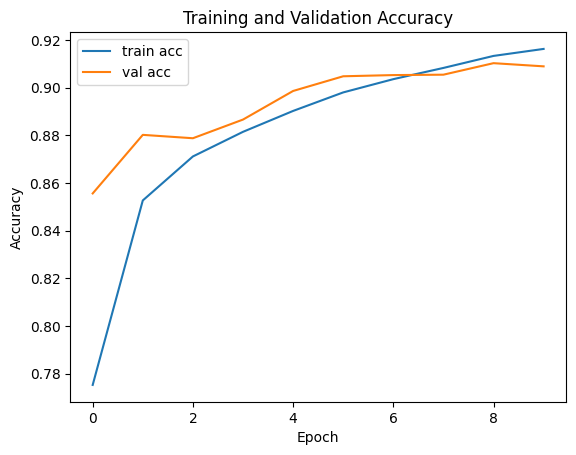

In [8]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


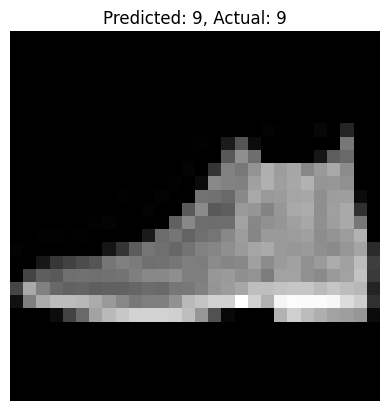

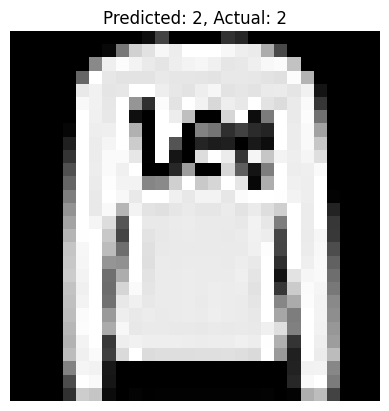

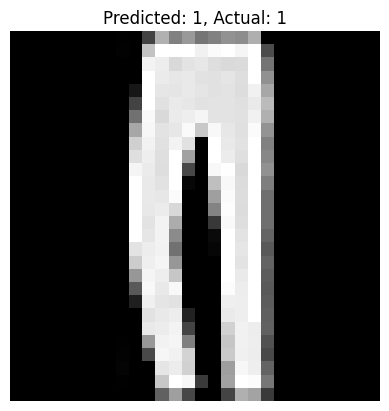

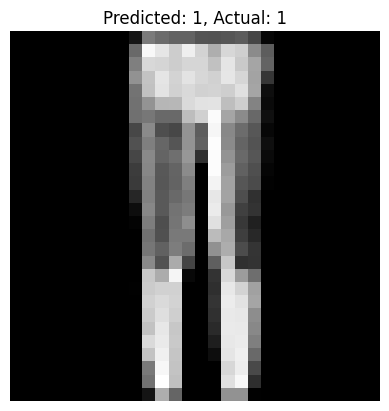

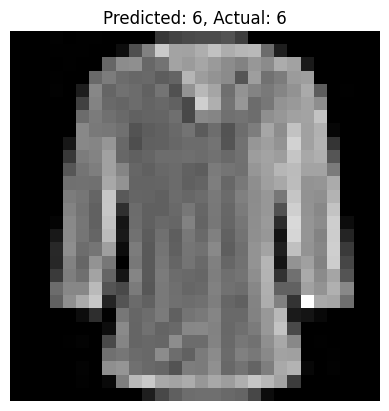

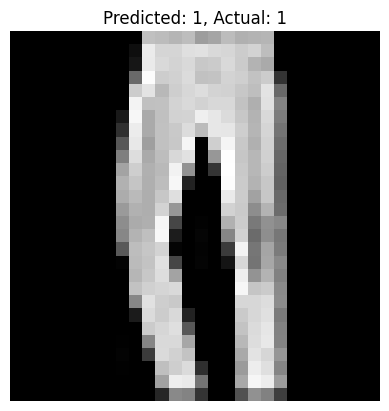

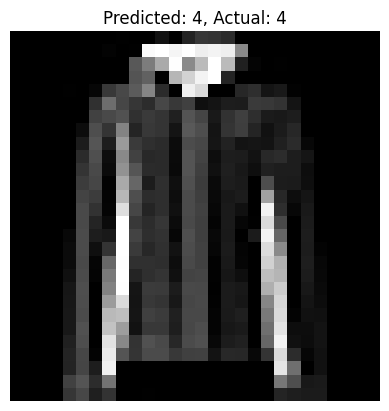

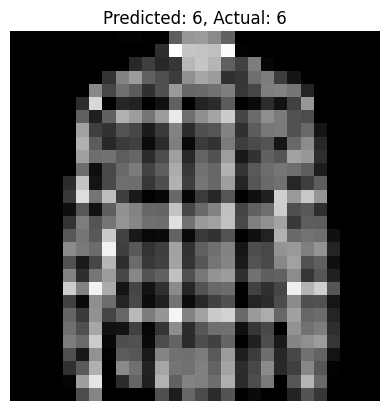

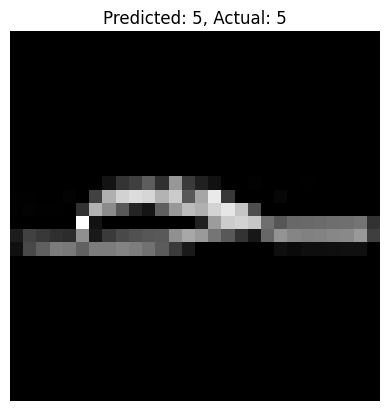

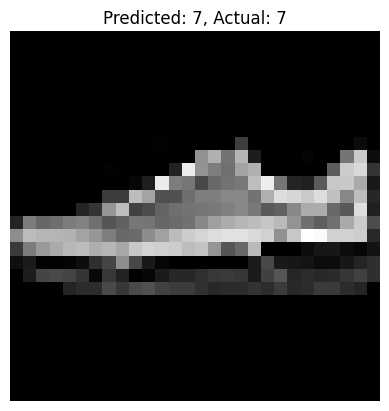

In [9]:
# Show some predictions
predictions = model.predict(X_test[:10])

for i in range(10):
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}, Actual: {np.argmax(y_test[i])}")
    plt.axis('off')
    plt.show()


In [10]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

# Normalize and reshape
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_split=0.2, batch_size=64)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 47s 61ms/step - accuracy: 0.7138 - loss: 0.7825 - val_accuracy: 0.8623 - val_loss: 0.3906
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 43s 57ms/step - accuracy: 0.8650 - loss: 0.3797 - val_accuracy: 0.8717 - val_loss: 0.3555
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - accuracy: 0.8856 - loss: 0.3182 - val_accuracy: 0.8852 - val_loss: 0.3207
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.8954 - loss: 0.2842 - val_accuracy: 0.8830 - val_loss: 0.3233
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 58ms/step - accuracy: 0.9080 - loss: 0.2567 - val_accuracy: 0.8992 - val_loss: 0.2775
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9150 - loss: 0.2331 - val_accuracy: 0.8936 - val_loss: 0.2864
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 81s 57ms/step - accuracy: 0.9216 - loss: 0.2111 - val_accuracy: 0.9044 - val_loss: 0.2635
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 83s 57ms/step - accuracy: 0.9270 - loss: 0.2005 - 

In [14]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9051 - loss: 0.2706
Test Accuracy: 0.9061


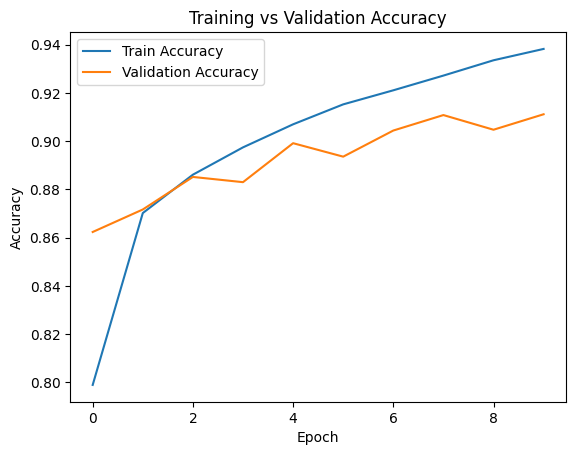

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training vs Validation Accuracy')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


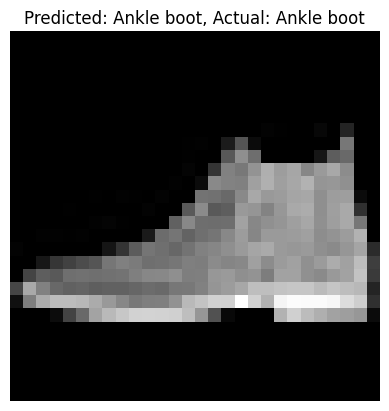

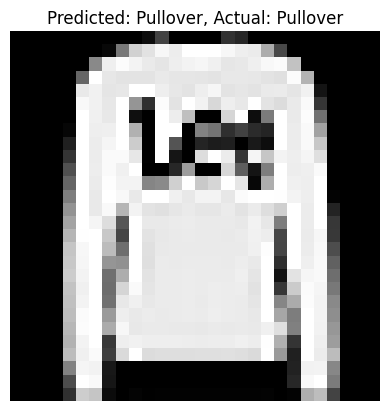

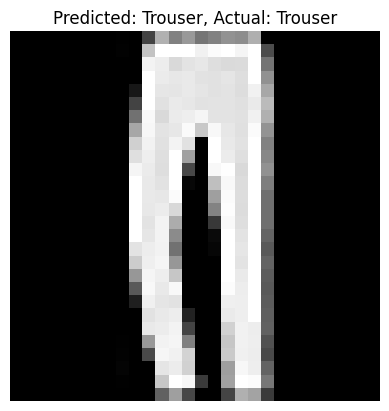

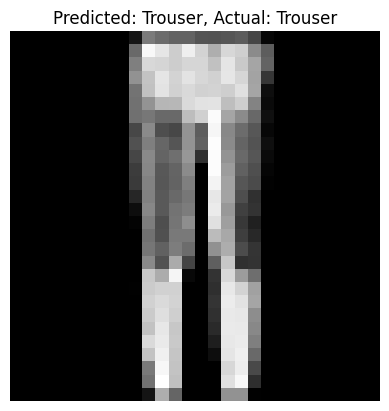

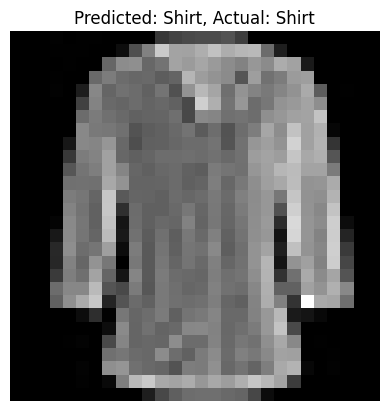

In [16]:
predictions = model.predict(X_test)

# Show first 5 predictions
for i in range(5):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {class_names[np.argmax(predictions[i])]}, Actual: {class_names[y_test[i]]}")
    plt.axis('off')
    plt.show()
